[Reference](https://medium.com/geekculture/machine-learning-tutorial-feature-engineering-and-feature-selection-for-beginners-dd15b9d354)

# Min-Max Normalization


In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 4 samples/observations and 2 variables/features
data = np.array([[4, 6], [11, 34], [10, 17], [1, 5]])

# create scaler method
scaler = MinMaxScaler(feature_range=(0,1))

# fit and transform the data
scaled_data = scaler.fit_transform(data)

print(scaled_data)

[[0.3        0.03448276]
 [1.         1.        ]
 [0.9        0.4137931 ]
 [0.         0.        ]]


# Standardization


In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 4 samples/observations and 2 variables/features
data = np.array([[4, 1], [11, 1], [10, 4], [1, 11]])

# create scaler method 
scaler = StandardScaler()

# fit and transform the data
scaled_data = scaler.fit_transform(data)

print(scaled_data)

[[-0.60192927 -0.79558708]
 [ 1.08347268 -0.79558708]
 [ 0.84270097 -0.06119901]
 [-1.32424438  1.65237317]]


In [3]:
print(scaled_data.mean(axis=0))

[0. 0.]


In [4]:
print(scaled_data.std(axis=0))

[1. 1.]


# How to Handle Categorical Features


## Label Encoding


In [5]:
# import packages
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

# intialise data of lists.
data = {'Gender':['male', 'female', 'female', 'male','male'],
        'Country':['Tanzania','Kenya', 'Tanzania', 'Tanzania','Kenya']}
  
# Create DataFrame
data = pd.DataFrame(data)


# create label encoder object
le = LabelEncoder()
  
data['Gender']= le.fit_transform(data['Gender'])
data['Country']= le.fit_transform(data['Country'])

print(data)

   Gender  Country
0       1        1
1       0        0
2       0        1
3       1        1
4       1        0


## One-hot-encoding


In [6]:
# import packages 
import numpy as np 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


# define example
data = np.array(['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot'])

# integer encode
label_encoder = LabelEncoder()

#fit and transform the data
integer_encoded = label_encoder.fit_transform(data)
print(integer_encoded)

# one-hot encode
onehot_encoder = OneHotEncoder(sparse=False)

#reshape the data
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

#fit and transform the data
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoded)

[0 0 2 0 1 1 2 0 2 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


# Feature Selection

## Univariate Selection


In [7]:
# Load packages
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
  
# Load iris data
iris_dataset = load_iris()
  
# Create features and target
X = iris_dataset.data
y = iris_dataset.target
  
# Convert to categorical data by converting data to integers
X = X.astype(int)
  
# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 2)
X_kbest_features = chi2_features.fit_transform(X, y)
  
# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 4
Reduced feature number: 2


## Feature Importance


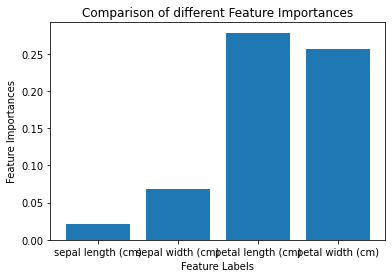

In [8]:
# Load libraries
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

# Load iris data
iris_dataset = load_iris()
  
# Create features and target
X = iris_dataset.data
y = iris_dataset.target
  
# Convert to categorical data by converting data to integers
X = X.astype(int)
 
 # Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

# Plotting a Bar Graph to compare the models
plt.bar(iris_dataset.feature_names, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

## Correlation Matrix Heatmap


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

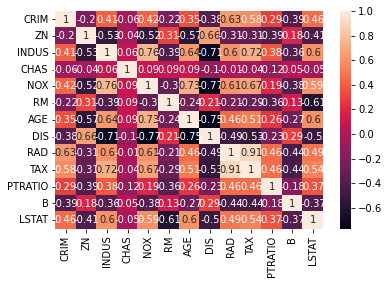

In [9]:
# Load libraries
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns

# load boston data
boston_dataset = load_boston()

# create a daframe for boston data
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
  
# Convert to categorical data by converting data to integers
#X = X.astype(int)
 
#ploting the heatmap for correlation
ax = sns.heatmap(boston.corr().round(2), annot=True)